In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('data/IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
import re

In [8]:
def clean_review(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [9]:
df['clean_review'] = df['review'].apply(clean_review)

In [10]:
df[['review', 'clean_review']].head(3)

,review,clean_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...


In [12]:
from textblob import TextBlob

In [13]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
df['polarity'] = df['clean_review'].apply(get_polarity)

In [15]:
def get_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [16]:
df['sentiment_predicted'] = df['polarity'].apply(get_sentiment)

In [19]:
df[['clean_review', 'polarity', 'sentiment_predicted']].head(10)

,clean_review,polarity,sentiment_predicted
0,one of the other reviewers has mentioned that ...,0.023433,positive
1,a wonderful little production the filming tech...,0.111490,positive
2,i thought this was a wonderful way to spend ti...,0.346324,positive
3,basically theres a family where a little boy j...,-0.060937,negative
4,petter matteis love in the time of money is a ...,0.217952,positive
5,probably my alltime favorite movie a story of ...,0.155294,positive
6,i sure would like to see a resurrection of a u...,0.285522,positive
7,this show was an amazing fresh innovative idea...,0.082716,positive
8,encouraged by the positive comments about this...,-0.142863,negative
9,if you like original gut wrenching laughter yo...,0.335000,positive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


C:\Users\admin\AppData\Local\Temp\ipykernel_1360\3530231846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_predicted', data=df, palette='Set2')


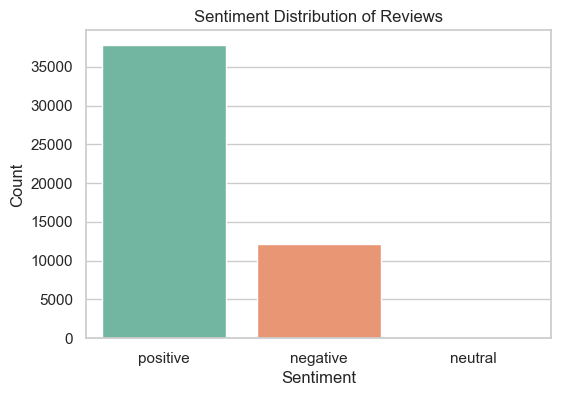

In [28]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_predicted', data=df, palette='Set2')

plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
all_words = ' '.join(df['clean_review'])

In [32]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_words)

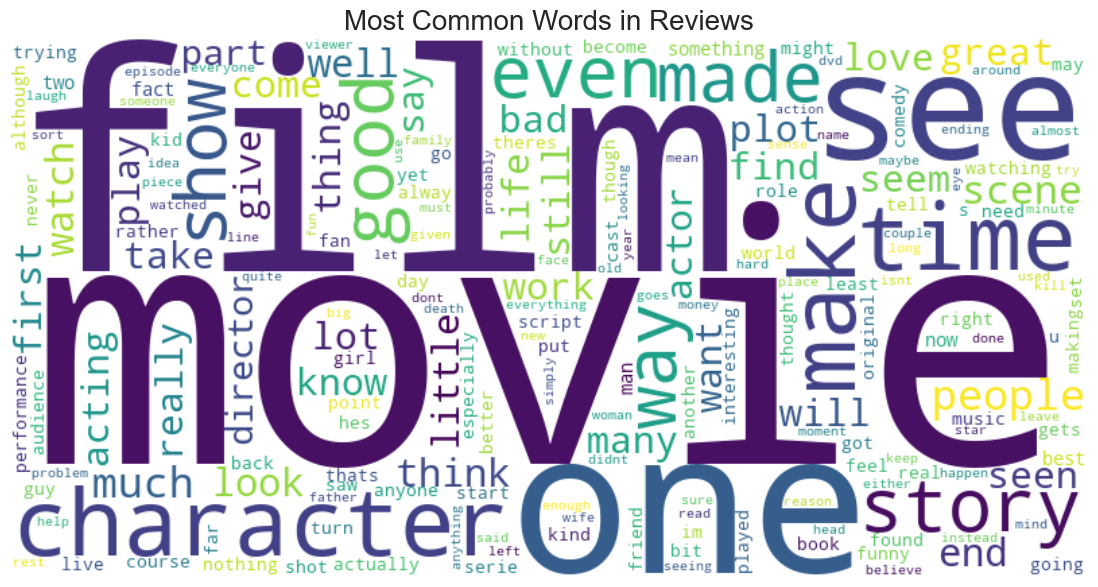

In [33]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews', fontsize=20)
plt.show()